In [22]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt

In [2]:
x = [[1,2], [3,4], [5,6], [7,8]]
y = [[3], [7], [11], [15]]

In [3]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [8]:
class MyNeuralNet (nn.Module):
    def __init__(self):
        super().__init__()
    
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
        
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x
        

In [9]:
print(nn.Linear(2, 7))

Linear(in_features=2, out_features=7, bias=True)


In [12]:
mynet = MyNeuralNet()

In [13]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[ 0.4867, -0.4737],
        [-0.2096, -0.4094],
        [ 0.4547, -0.2825],
        [ 0.1650, -0.4871],
        [-0.3158, -0.1218],
        [-0.2400,  0.2544],
        [ 0.3999,  0.5272],
        [-0.1065, -0.3462]], requires_grad=True)

In [15]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 0.4867, -0.4737],
        [-0.2096, -0.4094],
        [ 0.4547, -0.2825],
        [ 0.1650, -0.4871],
        [-0.3158, -0.1218],
        [-0.2400,  0.2544],
        [ 0.3999,  0.5272],
        [-0.1065, -0.3462]], requires_grad=True)
Parameter containing:
tensor([ 0.6435, -0.4696, -0.3295, -0.5262, -0.2560,  0.1789, -0.0640,  0.1444],
       requires_grad=True)
Parameter containing:
tensor([[-0.2873,  0.0520, -0.2980, -0.3445,  0.1860, -0.0683,  0.1481, -0.2496]],
       requires_grad=True)
Parameter containing:
tensor([-0.2511], requires_grad=True)


In [17]:
loss_func = nn.MSELoss()

In [18]:
_Y = mynet(X)
loss_value = loss_func(_Y, Y)
print(loss_value)

tensor(95.3300, grad_fn=<MseLossBackward0>)


In [20]:
opt = SGD(mynet.parameters(), lr=0.001)

In [21]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X), Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value)

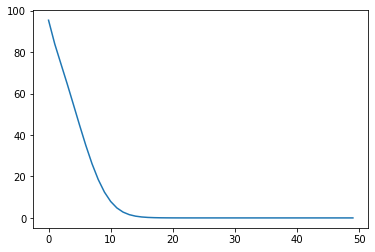

In [23]:
plt.plot(loss_history)